# Evaluation Metrics

## Classification Metrics

1.1 - Accuracy  
1.2 - Precision (P)  
1.3 - Recall (R)  
1.4 - F1 Score (F1)  
1.5 - Area under ROC (Receiver Opeating Characteristic) curve or simply Area under curve (AUC)  
1.6 - Log loss  
1.7 - Precision at k (P@k)  
1.8 - Average precision at k (AP@k)  
1.9 - Mean average precision at k (MAP@k)

## Regression Metrics

2.1 - Mean absolute error (MAE)  
2.2 - Mean squared error (MSE)  
2.3 - Root mean squared error (RMSE)  
2.4 - Root mean squared logarithmic error (RMSLE)  
2.5 - Mean percentage error (MPE)  
2.6 - Mean absolute percentage error (MAPE)  
2.7 - R-squared (R2)

## Metrics for Binary Classification problems

## 1.1 - Accuracy

#### Accuracy defines how accurate your model is.

In [1]:
## User defined function to calculate accuracy

def accuracy(y_true, y_pred):
    """
    Function to calculate accuracy
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    
    # initialize a simple counter for correct predictions
    correct_counter = 0
    
    # loop over all elements of y_true and y_pred together
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            # if prediction is equal to truth, increase the counter
            correct_counter += 1

    # return accuracy which is correct predictions over the number of samples
    return correct_counter / len(y_true)

In [2]:
## Using scikit-learn to calculate accuracy
from sklearn import metrics 

l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
metrics.accuracy_score(l1, l2)

0.625

### True Positive (TP), True Negative(TN), False Positive (FP), False Negative(FN)

#### FP ~ Type-I Error
#### FN ~ Type-II Error

In [3]:
def true_positive(y_true, y_pred):
    """
    Function to calculate True Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true positives
    """
    
    # initialize 
    tp = 0
    
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1

    return tp


def true_negative(y_true, y_pred):
    """
    Function to calculate True Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true negatives
    """
    
    # initialize 
    tn = 0
    
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1

    return tn

def false_positive(y_true, y_pred):
    """
    Function to calculate False Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false positives
    """
    
    # initialize 
    fp = 0
    
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1

    return fp

def false_negative(y_true, y_pred):
    """
    Function to calculate False Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false negatives
    """
    
    # initialize 
    fn = 0
    
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1

    return fn

***Note***: Above four functions will only be useful in binary classification

In [4]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

true_positive(l1, l2)

2

In [5]:
true_negative(l1, l2)

3

In [6]:
false_positive(l1, l2)

1

In [7]:
false_negative(l1, l2)

2

In [8]:
## Accuracy score using TP, TN, FP, FN
def accuracy_v2(y_true, y_pred):
    """
    Function to calculate accuracy using tp/tn/fp/fn
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    accuracy_score = (tp + tn)/(tp + tn + fp + fn)
    return accuracy_score

In [9]:
## Checking the correctness of three accuracy functions

l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

## First accuracy function
accuracy(l1, l2)

0.625

In [10]:
## Second accuracy function
accuracy_v2(l1, l2)

0.625

In [11]:
## Scikit-learn's accuracy function
metrics.accuracy_score(l1, l2)

0.625

## 1.2 - Precision

In [12]:
def precision(y_true, y_pred):
    """
    Function to calculate precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: precision score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp /(tp + fp)
    return precision

In [13]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

precision(l1, l2)

0.6666666666666666

## 1.3 - Recall

In [14]:
def recall(y_true, y_pred):
    """
    Function to calculate recall
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: recall score
    """
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp /(tp + fn)
    return recall

In [15]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

recall(l1, l2)

0.5

### Precision-Recall Curve

In [16]:
# targets
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

# probability values for a sample being assigned value of 1
# (we now look at probabilities instead of predicted values)
y_pred = [0.02638412, 0.11114267, 0.31620708,
          0.0490937, 0.0191491, 0.17554844,
          0.15952202, 0.03819563, 0.11639273,
          0.079377, 0.08584789, 0.39095342,
          0.27259048, 0.03447096, 0.04644807, 
          0.03543574, 0.18521942, 0.05934905,
          0.61977213, 0.33056815]

In [17]:
precisions = []
recalls = []

# we assume some thresholds
thresholds = [0.0490937, 0.05934905, 0.079377,
              0.08584789, 0.11114267, 0.11639273,
              0.15952202, 0.17554844, 0.18521942,
              0.27259048, 0.31620708, 0.33056815,
              0.39095342, 0.61977213]

# for every threshold, calculate predictions in binary and append calculated precisions and recalls to their respective lists
for i in thresholds:
    temp_prediction = [1 if x >= i else 0 for x in y_pred]
    p = precision(y_true, temp_prediction)
    r = recall(y_true, temp_prediction)
    precisions.append(p)
    recalls.append(r)

Text(0, 0.5, 'Precision')

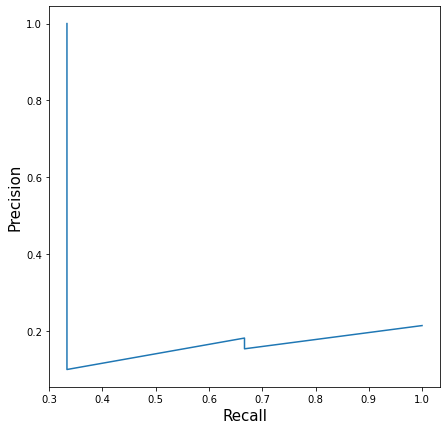

In [18]:
## Plot the precisions and recalls
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.plot(recalls, precisions)
plt.xlabel("Recall", fontsize=15)
plt.ylabel("Precision", fontsize=15)

## 1.4 - F1 Score

In [19]:
def f1(y_true, y_pred):
    """
    Function to calculate f1 score
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: f1 score
    """
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    score = 2 * p * r / (p + r)
    return score

In [20]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

f1(y_true, y_pred)

0.5714285714285715

In [21]:
## Using scikit-learn's f1_score function
metrics.f1_score(y_true, y_pred)

0.5714285714285715

## True Positive Rate (TPR) ~ Recall ~ Sensitivity

In [22]:
def tpr(y_true, y_pred):
    """
    Function to calculate tpr
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: tpr/recall
    """
    return recall(y_true, y_pred)

In [23]:
def fpr(y_true, y_pred):
    """
    Function to calculate fpr
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: fpr
    """
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    return fp / (fp + tn)

*Note*: 
#### **1** - **FPR** = **Specificity** = **True Negative Rate(TNR)**

### ROC Curve

In [24]:
# empty lists to store tpr and fpr values
tpr_list = []
fpr_list = []

# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]

# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
         0.85, 0.15, 0.99]

# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

# loop over all thresholds
for thresh in thresholds:
    # calculate predictions for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    
    # calculate tpr
    temp_tpr = tpr(y_true, temp_pred)
    
    # calculate fpr
    temp_fpr = fpr(y_true, temp_pred)
    
    # append tpr and fpr to lists
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)

In [25]:
import pandas as pd 
summary_df = pd.DataFrame({'threshold': thresholds,
                           'tpr':tpr_list,
                           'fpr':fpr_list})
summary_df

,threshold,tpr,fpr
0,0.00,1.0,1.0
1,0.10,1.0,0.9
2,0.20,1.0,0.7
3,0.30,0.8,0.6
4,0.40,0.8,0.3
5,0.50,0.8,0.3
6,0.60,0.8,0.2
7,0.70,0.6,0.1
8,0.80,0.6,0.1
9,0.85,0.4,0.1


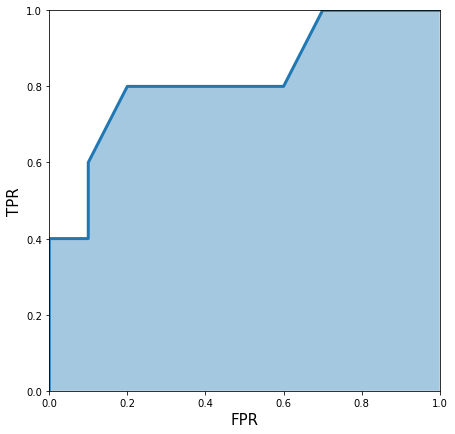

In [26]:
# Plot ROC Curve
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

## 1.5 - Area under ROC curve ~ Area under curve ~ AUC

#### We will use `roc_auc_score` function of scikit-learn

In [27]:
# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]

# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
         0.85, 0.15, 0.99]

metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

#### Impact of thresholds on true positives and false positives

In [28]:
# empty lists to store true positive and false positive values
tp_list = []
fp_list = []

# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]

# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
         0.85, 0.15, 0.99]

# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

# loop over all thresholds
for thresh in thresholds:
    # calculate predictions for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    
    # calculate tp
    temp_tp = true_positive(y_true, temp_pred)
    
    # calculate fp
    temp_fp = false_positive(y_true, temp_pred)
    
    # append tp and fp to lists
    tp_list.append(temp_tp)
    fp_list.append(temp_fp)
    
summary_df1 = pd.DataFrame({'threshold': thresholds,
                           'tp':tp_list,
                           'fp':fp_list})
summary_df1

,threshold,tp,fp
0,0.00,5,10
1,0.10,5,9
2,0.20,5,7
3,0.30,4,6
4,0.40,4,3
5,0.50,4,3
6,0.60,4,2
7,0.70,3,1
8,0.80,3,1
9,0.85,2,1


#### Most of the time, top-left value on ROC curve should give you a quite good threshold

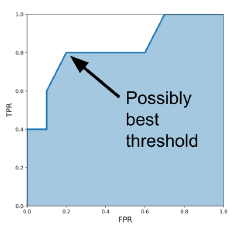

## 1.6 - Log Loss

In [29]:
import numpy as np 

def log_loss(y_true, y_proba):
    """
    Function to calculate log loss
    :param y_true: list of true values
    :param y_proba: list of probabilities for 1
    :return: overall log loss
    """
    # define an epsilon value
    # this can also be an input
    # this value is used to clip probabilities
    epsilon = 1e-15
    
    # initialize empty list to store individual losses
    loss = []
    
    # loop over all true and predicted probability values
    for yt, yp in zip(y_true, y_proba):
        # adjust probability
        # 0 gets converted to 1e-15
        # 1 gets converted to 1-1e-15
        yp = np.clip(yp, epsilon, 1 - epsilon)
        
        # calculate loss for one sample
        temp_loss = - 1.0 * (yt * np.log(yp) + (1 - yt)*np.log(1 - yp))
        
        # add loss to list
        loss.append(temp_loss)
    
    # return mean loss over all samples
    return np.mean(loss)

In [30]:
## Test our function for log loss

y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]

y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 
           0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
           0.85, 0.15, 0.99]

log_loss(y_true, y_proba)

0.49882711861432294

In [31]:
## Compare it with scikit-learn's log loss
metrics.log_loss(y_true, y_proba)

0.49882711861432294

## Metrics for Multi-class Classification problems

**Precision** for a multi-class classification problem can be of three types:-
1. Macro averaged precision
2. Micro averaged precision
3. Weighted precision

In [33]:
## Macro average precision

import numpy as np 

def macro_precision(y_true, y_pred):
    """
    Function to calculate macro averaged precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: macro precision score
    """
    
    # find the number of classes by taking length of unique values in true list
    num_classes = len(np.unique(y_true))
                      
    # initialize precision to 0
    precision = 0
    
    # loop over all classes 
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
                      
        # calculate true positive for current class
        tp = true_positive(temp_true, temp_pred)
                      
        # calculate false positive for current class
        fp = false_positive(temp_true, temp_pred)
                      
        # calculate precision for current class
        temp_precision = tp / (tp + fp)
        
        # keep adding precision for all classes
        precision += temp_precision
                      
    # calculate and return average precision over all classes
    precision /= num_classes
    return precision

In [34]:
## Micro average precision

import numpy as np 

def micro_precision(y_true, y_pred):
    """
    Function to calculate micro averaged precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: micro precision score
    """
    
    # find the number of classes by taking length of unique values in true list
    num_classes = len(np.unique(y_true))
                      
    # initialize tp and fp to 0
    tp = 0
    fp = 0
    
    # loop over all classes 
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
                      
        # calculate true positive for current class and update overall tp
        tp += true_positive(temp_true, temp_pred)
                      
        # calculate false positive for current class and update overall fp
        fp += false_positive(temp_true, temp_pred)
                                           
    # calculate and return overall precision 
    precision = tp / (tp + fp)
    return precision

In [35]:
## Weighted averaged precision
from collections import Counter
import numpy as np 

def weighted_precision(y_true, y_pred):
    """
    Function to calculate weighted averaged precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: weighted precision score
    """
    
    # find the number of classes by taking length of unique values in true list
    num_classes = len(np.unique(y_true))
    
    # create class:sample count dictionary
    # it will look like this
    # {0:20, 1:15, 2:21}
    class_counts = Counter(y_true)
    
    # initialize precision to 0
    precision = 0
        
    # loop over all classes 
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
                      
        # calculate tp and fp for current class
        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
                      
        # calculate precision for current class
        temp_precision = tp / (tp + fp)
        
        # multiply precision with count of samples in class
        weighted_precision = class_counts[class_] * temp_precision
        
        # add to overall precision
        precision += weighted_precision
                                           
    # calculate overall precision by dividing by total number samples
    overall_precision = precision / len(y_true)
    return overall_precision

In [36]:
# Comparing our implementations with scikit-learn's functions

y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

macro_precision(y_true, y_pred)

0.3611111111111111

In [37]:
metrics.precision_score(y_true, y_pred, average="macro")

0.3611111111111111

In [38]:
micro_precision(y_true, y_pred)

0.4444444444444444

In [39]:
metrics.precision_score(y_true, y_pred, average="micro")

0.4444444444444444

In [40]:
weighted_precision(y_true, y_pred)

0.39814814814814814

In [41]:
metrics.precision_score(y_true, y_pred, average="weighted")

0.39814814814814814

Similarly, **Recall** for a multi-class classification problem can be of three types:-
1. Macro averaged recall
2. Micro averaged recall
3. Weighted recall

In [42]:
## Macro average recall

import numpy as np 

def macro_recall(y_true, y_pred):
    """
    Function to calculate macro averaged recall
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: macro recall score
    """
    
    # find the number of classes by taking length of unique values in true list
    num_classes = len(np.unique(y_true))
                      
    # initialize recall to 0
    recall = 0
    
    # loop over all classes 
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
                      
        # calculate true positive for current class
        tp = true_positive(temp_true, temp_pred)
                      
        # calculate false negative for current class
        fn = false_negative(temp_true, temp_pred)
                      
        # calculate recall for current class
        temp_recall = tp / (tp + fn)
        
        # keep adding recall for all classes
        recall += temp_recall
                      
    # calculate and return average recall over all classes
    recall /= num_classes
    return recall

In [43]:
## Micro average recall

import numpy as np 

def micro_recall(y_true, y_pred):
    """
    Function to calculate micro averaged recall
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: micro recall score
    """
    
    # find the number of classes by taking length of unique values in true list
    num_classes = len(np.unique(y_true))
                      
    # initialize tp and fp to 0
    tp = 0
    fn = 0
    
    # loop over all classes 
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
                      
        # calculate true positive for current class and update overall tp
        tp += true_positive(temp_true, temp_pred)
                      
        # calculate false negative for current class and update overall fn
        fn += false_negative(temp_true, temp_pred)
                                           
    # calculate and return overall recall 
    recall = tp / (tp + fn)
    return recall

In [50]:
## Weighted averaged recall
from collections import Counter
import numpy as np 

def weighted_recall(y_true, y_pred):
    """
    Function to calculate weighted averaged recall
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: weighted recall score
    """
    
    # find the number of classes by taking length of unique values in true list
    num_classes = len(np.unique(y_true))
    
    # create class:sample count dictionary
    # it will look like this
    # {0:20, 1:15, 2:21}
    class_counts = Counter(y_true)
    
    # initialize recall to 0
    recall = 0
        
    # loop over all classes 
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
                      
        # calculate tp and fp for current class
        tp = true_positive(temp_true, temp_pred)
        fn = false_negative(temp_true, temp_pred)
                      
        # calculate recall for current class
        temp_recall = tp / (tp + fn)
        
        # multiply recall with count of samples in class
        weighted_recall = class_counts[class_] * temp_recall
        
        # add to overall precision
        recall += weighted_recall
                                           
    # calculate overall recall by dividing by total number samples
    overall_recall = recall / len(y_true)
    return overall_recall

In [45]:
# Comparing our implementations with scikit-learn's functions

y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

macro_recall(y_true, y_pred)

0.4166666666666667

In [46]:
metrics.recall_score(y_true, y_pred, average="macro")

0.4166666666666667

In [47]:
micro_recall(y_true, y_pred)

0.4444444444444444

In [48]:
metrics.recall_score(y_true, y_pred, average="micro")

0.4444444444444444

In [51]:
weighted_recall(y_true, y_pred)

0.4444444444444444

In [52]:
metrics.recall_score(y_true, y_pred, average="weighted")

0.4444444444444444

Similarly, **F1 Score** for a multi-class classification problem can be of three types:-
1. Macro averaged f1
2. Micro averaged f1
3. Weighted f1

In [58]:
## Macro averaged f1
import numpy as np 

def macro_f1(y_true, y_pred):
    """
    Function to calculate macro averaged f1
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: macro f1
    """
    
    # find the number of classes by taking length of unique values in true list
    num_classes = len(np.unique(y_true))
    
    # initialize f1 to 0
    f1 = 0
        
    # loop over all classes 
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
                      
        # calculate precision and recall for current class
        p = precision(temp_true, temp_pred)
        r = recall(temp_true, temp_pred)
                      
        # calculate f1 for current class
        if p + r != 0:
            temp_f1 = 2 * p * r / (p + r)
        else: 
            temp_f1 = 0
        
        # keep adding f1 for all classes
        f1 += temp_f1
                                           
    # calculate and return average f1 over all classes
    f1 /= num_classes
    return f1

In [76]:
## Micro averaged f1
import numpy as np 

def micro_f1(y_true, y_pred):
    """
    Function to calculate micro averaged f1
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: micro f1
    """
    
    # find the number of classes by taking length of unique values in true list
    num_classes = len(np.unique(y_true))
    
    # initialize tp, fp and fn to 0
    tp = 0
    fp = 0
    fn = 0
        
    # loop over all classes 
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
                      
        # calculate true positive for current class and update overall tp
        tp += true_positive(temp_true, temp_pred)
        
        # calculate false positive for current class and update overall fp
        fp += false_positive(temp_true, temp_pred)
                      
        # calculate false negative for current class and update overall fn
        fn += false_negative(temp_true, temp_pred)
                                           
    # calculate and return overall f1 
    f1 = 2 * tp / (2 * tp + fp + fn)
    return f1

In [55]:
## Weighted f1
from collections import Counter
import numpy as np 

def weighted_f1(y_true, y_pred):
    """
    Function to calculate weighted f1
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: weighted f1
    """
    
    # find the number of classes by taking length of unique values in true list
    num_classes = len(np.unique(y_true))
    
    # create class:sample count dictionary
    # it will look like this
    # {0:20, 1:15, 2:21}
    class_counts = Counter(y_true)
    
    # initialize f1 to 0
    f1 = 0
        
    # loop over all classes 
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
                      
        # calculate precision and recall for current class
        p = precision(temp_true, temp_pred)
        r = recall(temp_true, temp_pred)
                      
        # calculate f1 for current class
        if p + r != 0:
            temp_f1 = 2 * p * r / (p + r)
        else: 
            temp_f1 = 0
        
        # multiply f1 with count of samples in class
        weighted_f1 = class_counts[class_] * temp_f1
        
        # add to f1
        f1 += weighted_f1
                                           
    # calculate overall f1 by dividing by total number samples
    overall_f1 = f1 / len(y_true)
    return overall_f1

In [70]:
# Comparing our implementations with scikit-learn's functions

y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

macro_f1(y_true, y_pred)

0.38095238095238093

In [71]:
metrics.f1_score(y_true, y_pred, average="macro")

0.38095238095238093

In [78]:
micro_f1(y_true, y_pred)

0.4444444444444444

In [77]:
metrics.f1_score(y_true, y_pred, average="micro")

0.4444444444444444

In [74]:
weighted_f1(y_true, y_pred)

0.41269841269841273

In [75]:
metrics.f1_score(y_true, y_pred, average="weighted")

0.41269841269841273

## Confusion Matrix

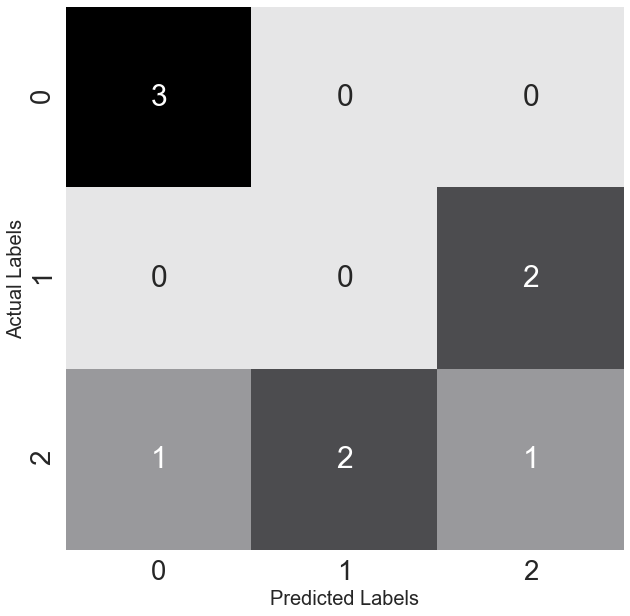

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# some targets
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]

# some predictions
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

# get confusion matrix from sklearn
cm = metrics.confusion_matrix(y_true, y_pred)

# plot using matplotlib and seaborn
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel('Actual Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)
plt.show()

In [5]:
cm

array([[3, 0, 0],
       [0, 0, 2],
       [1, 2, 1]], dtype=int64)

## Metrics for Multi-label Classification problems

## 1.7 - Precision at k (P@k)  

In [10]:
def pk(y_true, y_pred, k):
    """
    This function calculates precision at k for a single sample
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :param k: the value of k 
    :return: precision at a given value k 
    """
    
    # if k is 0, return 0 (we should never have this as k is always >= 1)
    if k == 0:
        return 0
    
    # we are interested only in top-k predictions
    y_pred = y_pred[:k]
    
    # convert predictions to set
    pred_set = set(y_pred)
    
    # convert actual values to set
    true_set = set(y_true)
    
    # find common values
    common_values = pred_set.intersection(true_set)
    
    # return length of common values over k
    return len(common_values) / len(y_pred[:k])

## 1.8 - Average Precision at k (AP@k)  

In [12]:
def apk(y_true, y_pred, k):
    """
    This function calculates average precision at k for a single sample
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :param k: the value of k 
    :return: average precision at a given value k 
    """
    # initialize p@k list of values
    pk_values = []
    
    # loop over all k, from 1 to k + 1
    for i in range(1, k + 1):
        # calculate p@i and append to list
        pk_values.append(pk(y_true, y_pred, i))
    
    # if we have no values in the list, return 0
    if len(pk_values) == 0:
        return 0
    
    # else, we return the sum of list over length of list
    return sum(pk_values) / len(pk_values)

In [13]:
# check above two functions

y_true = [
    [1, 2, 3],
    [0, 2],
    [1],
    [2, 3],
    [1, 0],
    []
]

y_pred = [
    [0, 1, 2],
    [1],
    [0, 2, 3],
    [2, 3, 4, 0],
    [0, 1, 2],
    [0]
]

for i in range(len(y_true)):
    for j in range(1, 4):
        print(
        f"""
        y_true={y_true[i]},
        y_pred={y_pred[i]},
        AP@{j}={apk(y_true[i], y_pred[i], k=j)}
        """
        )


        y_true=[1, 2, 3],
        y_pred=[0, 1, 2],
        AP@1=0.0
        

        y_true=[1, 2, 3],
        y_pred=[0, 1, 2],
        AP@2=0.25
        

        y_true=[1, 2, 3],
        y_pred=[0, 1, 2],
        AP@3=0.38888888888888884
        

        y_true=[0, 2],
        y_pred=[1],
        AP@1=0.0
        

        y_true=[0, 2],
        y_pred=[1],
        AP@2=0.0
        

        y_true=[0, 2],
        y_pred=[1],
        AP@3=0.0
        

        y_true=[1],
        y_pred=[0, 2, 3],
        AP@1=0.0
        

        y_true=[1],
        y_pred=[0, 2, 3],
        AP@2=0.0
        

        y_true=[1],
        y_pred=[0, 2, 3],
        AP@3=0.0
        

        y_true=[2, 3],
        y_pred=[2, 3, 4, 0],
        AP@1=1.0
        

        y_true=[2, 3],
        y_pred=[2, 3, 4, 0],
        AP@2=1.0
        

        y_true=[2, 3],
        y_pred=[2, 3, 4, 0],
        AP@3=0.8888888888888888
        

        y_true=[1, 0],
        y_pred=[0, 1, 2],
        AP@1=1.

## 1.9 - Mean average precision at k (MAP@k)

In [14]:
def mapk(y_true, y_pred, k):
    """
    This function calculates mean average precision at k for a single sample
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :param k: the value of k 
    :return: mean average precision at a given value k 
    """
    # initialize empty list for apk values
    apk_values = []
    
    # loop over all samples
    for i in range(len(y_true)):
        # store apk values for every sample
        apk_values.append(apk(y_true[i], y_pred[i], k=k))
    
    # return mean of apk values list
    return sum(apk_values) / len(apk_values)

In [15]:
y_true = [
    [1, 2, 3],
    [0, 2],
    [1],
    [2, 3],
    [1, 0],
    []
]

y_pred = [
    [0, 1, 2],
    [1],
    [0, 2, 3],
    [2, 3, 4, 0],
    [0, 1, 2],
    [0]
]

mapk(y_true, y_pred, k=1)

0.3333333333333333

In [16]:
mapk(y_true, y_pred, k=2)

0.375

In [17]:
mapk(y_true, y_pred, k=3)

0.3611111111111111

In [18]:
mapk(y_true, y_pred, k=4)

0.34722222222222215

# Metrics for Regression

## 2.1 - Mean absolute error (MAE) 